In [3]:
#--------------------------------------------------------------------------------------------------------------#
#Joel Aoto Pathrise Data Challenge
#"Derive insights around if a fellow will ultimately be placed at a company and 
# how long until a placement is expected"
#--------------------------------------------------------------------------------------------------------------#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None, "display.max_columns", None)

df = pd.read_excel (r'/Users/joelaoto/Documents/pathrise/Data_Pathrise.xlsx', sheet_name='data')
var = pd.read_excel (r'/Users/joelaoto/Documents/pathrise/Data_Pathrise.xlsx', sheet_name='variables',header = None)

#--------------------------------------------------------------------------------------------------------------#
# how do we want to create insights?
# 1. level of education --> # of placed status (pie chart)
# 2. statistics of placed status with race and gender (pie chart)
# 3. which "biggest challange" has the lowest and highest placed rate

# how do we want to predict length of placement?
# 1. dependent on the variable we are studying, i.e. level of education --> average placement time
# 2. an average placement time of all averages from a specific applicants variables:
#    [avg(Track) + avg(duration) +avg(emp_status) +...+ avg(gender) + avg(race)]/11 = estimated placement time

#--------------------------------------------------------------------------------------------------------------#

In [4]:
#--------------------------------------------------------------------------------------------------------------#
# Analytics on the Races of Placed and Unplaced applicants
#--------------------------------------------------------------------------------------------------------------#

#find all placed applicants
#2 ways to find filter data frames
placed = df[df.pathrise_status == 'Placed']
pdf = df.query('pathrise_status == "Placed"')
psz = placed.id.size

#percentage of applicants that are placed: 956/2544 => 37.6% placed rate

#make variables for the different race and gender options
nan = 'Null'
esa = 'East Asian or Asian American'
baa = 'Black, Afro-Caribbean, or African American'
lha = 'Latino or Hispanic American'
mea = 'Middle Eastern or Arab American'
naa = 'Native American or Alaskan Native'
nhw = 'Non-Hispanic White or Euro-American'
sai = 'South Asian or Indian American'
two = 'Two or More Races'
dec = 'Decline to Self Identify'
fem = 'Female'
mle = 'Male'
nb  = 'Non-Binary'


#find the different races that were collected in the data and count the number of each
#find race of applicants either placed or not

#make databases for each race
af_d = df.query('race == @baa')
ea_d = df.query('race == @esa')
lh_d = df.query('race == @lha')
me_d = df.query('race == @mea')
na_d = df.query('race == @naa')
nh_d = df.query('race == @nhw')
sa_d = df.query('race == @sai')
tw_d = df.query('race == @two')
dc_d = df.query('race == @dec')
null_d = df.query('race == @nan')
#new database for placed
af_p = pdf.query('race == @baa')
ea_p = pdf.query('race == @esa')
lh_p = pdf.query('race == @lha')
me_p = pdf.query('race == @mea')
na_p = pdf.query('race == @naa')
nh_p = pdf.query('race == @nhw')
sa_p = pdf.query('race == @sai')
tw_p = pdf.query('race == @two')
dc_p = pdf.query('race == @dec')

#finding the sizes of each data base to compare
#number of applicants
afall = len(af_d)
eaall = len(ea_d)
lhall = len(lh_d)
meall = len(me_d)
naall = len(na_d)
nhall = len(nh_d)
saall = len(sa_d)
twall = len(tw_d)
dcall = len(dc_d)


#number of placed 
afsz = len(af_p)
easz = len(ea_p)
lhsz = len(lh_p)
mesz = len(me_p)
nasz = len(na_p)
nhsz = len(nh_p)
sasz = len(sa_p)
twsz = len(tw_p)
dcsz = len(dc_p)
totsz= len(df) #number of applicants in df
totp = len(pdf)#number of applincants in placed df

#finding the total number of placed applicants
totalP = afsz + easz + lhsz + mesz + nasz + nhsz + sasz + twsz + dcsz
#total number of applicants
totalall = afall+ eaall+lhall+meall+naall+nhall+saall+twall+dcall

#number of applicants without a specified race or empty space
nansz  = totp - totalP
nanall = totsz - totalall

#percent placed(placed/applied)
pea = (easz/eaall)* 100
paf = (afsz/afall)* 100
plh = (lhsz/lhall)* 100
pme = (mesz/meall)* 100
pna = (nasz/naall)* 100
pnh = (nhsz/nhall)* 100
psa = (sasz/saall)* 100
ptw = (twsz/twall)* 100
pdc = (dcsz/dcall)* 100
pnan= (nansz/nanall)* 100

#average percent of placement
avgP = (pea + paf + plh + pme + pna + pnh + psa + ptw + pdc + pnan)/10
#avgP ~ 41%

#average percent of placement without Native American applicants
avgPna = (pea + paf + plh + pme + pnh + psa + ptw + pdc + pnan)/9
#avgPna ~ 34.5%

#variables for making database rz
races = [esa,baa,lha,mea,naa,nhw,sai,two,dec,nan]
applied = [eaall,afall,lhall,meall,naall,nhall,saall,twall,dcall,nanall]
placed = [easz,afsz,lhsz,mesz,nasz,nhsz,sasz,twsz,dcsz,nansz]
percent = [pea,paf,plh,pme,pna,pnh,psa,ptw,pdc,pnan]

#new database for all the values that we use for modelling the data
rz = pd.DataFrame({"race" : races,
                   "placed" : placed,
                   "applied" : applied,
                   "percent" : percent
                   })
#function that sorts the data frame by length of job search
def timeSort(df):
    #variable used
    one = "1-2 months"
    three ="3-5 months"
    six ="6 months to a year"
    less = "Less than one month"
    over = "Over a year"
    
    df_1 = df.query('length_of_job_search == @one')
    df_3 = df.query('length_of_job_search == @three')
    df_6 = df.query('length_of_job_search == @six')
    df_l = df.query('length_of_job_search == @less')
    df_o = df.query('length_of_job_search == @over')
    
    un = len(df_1)
    tre = len(df_3)
    sie = len(df_6)
    le = len(df_l)
    ov = len(df_o)
    
    var = [un,tre,sie,le,ov]
    #return the array of elements that we want
    return var

#run function for each df
af_time = timeSort(af_p)
ea_time = timeSort(ea_p)
lh_time = timeSort(lh_p)
me_time = timeSort(me_p)
na_time = timeSort(na_p)
nh_time = timeSort(nh_p)
sa_time = timeSort(sa_p)
tw_time = timeSort(tw_p)
dc_time = timeSort(dc_p)

#sort new arrays to have a cleaner data frame
T_one = [af_time[0],ea_time[0],lh_time[0],me_time[0],na_time[0],
         nh_time[0],sa_time[0],tw_time[0],dc_time[0]]
T_thr = [af_time[1],ea_time[1],lh_time[1],me_time[1],na_time[1],
         nh_time[1],sa_time[1],tw_time[1],dc_time[1]]
T_six = [af_time[2],ea_time[2],lh_time[2],me_time[2],na_time[2],
         nh_time[2],sa_time[2],tw_time[2],dc_time[2]]
T_les = [af_time[3],ea_time[3],lh_time[3],me_time[3],na_time[3],
         nh_time[3],sa_time[3],tw_time[3],dc_time[3]]
T_ovr = [af_time[4],ea_time[4],lh_time[4],me_time[4],na_time[4],
         nh_time[4],sa_time[4],tw_time[4],dc_time[4]]

#initialize the data frame for Race X Time
time_df = pd.DataFrame({"Race":[baa,esa,lha,mea,naa,nhw,sai,two,dec],
                        "One-Two Months": T_one,
                        "Three-Five Months":T_thr,
                        "6 Months to a Year":T_six,
                        "Less than a Month": T_les,
                        "Over a Year": T_ovr})

#function that shows the times of job search in percentages
def timepct(timearr,arrsz):
    sz0 = (timearr[0]/arrsz)*100
    sz1 = (timearr[1]/arrsz)*100
    sz2 = (timearr[2]/arrsz)*100
    sz3 = (timearr[3]/arrsz)*100
    sz4 = (timearr[4]/arrsz)*100
    
    pct = [sz0,sz1,sz2,sz3,sz4]
    return pct

aft_pct = timepct(af_time,afsz)
eat_pct = timepct(ea_time,easz)
lht_pct = timepct(lh_time,lhsz)
met_pct = timepct(me_time,mesz)
nat_pct = timepct(na_time,nasz)
nht_pct = timepct(nh_time,nhsz)
sat_pct = timepct(sa_time,sasz)
twt_pct = timepct(tw_time,twsz)
dct_pct = timepct(dc_time,dcsz)

pct_one = [aft_pct[0],eat_pct[0],lht_pct[0],met_pct[0],nat_pct[0],
           nht_pct[0],sat_pct[0],twt_pct[0],dct_pct[0]]
pct_thr = [aft_pct[1],eat_pct[1],lht_pct[1],met_pct[1],nat_pct[1],
           nht_pct[1],sat_pct[1],twt_pct[1],dct_pct[1]]
pct_six = [aft_pct[2],eat_pct[2],lht_pct[2],met_pct[2],nat_pct[2],
           nht_pct[2],sat_pct[2],twt_pct[2],dct_pct[2]]
pct_les = [aft_pct[3],eat_pct[3],lht_pct[3],met_pct[3],nat_pct[3],
           nht_pct[3],sat_pct[3],twt_pct[3],dct_pct[3]]
pct_ovr = [aft_pct[4],eat_pct[4],lht_pct[4],met_pct[4],nat_pct[4],
           nht_pct[4],sat_pct[4],twt_pct[4],dct_pct[4]]

#initialize the data frame
pct_time = pd.DataFrame({"Race":[baa,esa,lha,mea,naa,nhw,sai,two,dec],
                        "One-Two Months": pct_one,
                        "Three-Five Months":pct_thr,
                        "6 Months to a Year":pct_six,
                        "Less than a Month": pct_les,
                        "Over a Year": pct_ovr})


# print(avgPna)
# pct_time


In [7]:
#--------------------------------------------------------------------------------------------------------------#
#Analytics of the Education of Placed and Unplaced applicants
#--------------------------------------------------------------------------------------------------------------#

# we have the the data from the placed and total data frames so let us first set up our variables:
bd = "Bachelor's Degree"
dpd= "Doctorate or Professional Degree" 
ged= "GED or equivalent"
hs = "High School Graduate"
md = "Master's Degree"
sc = "Some College, No Degree"
shs= "Some High School"

bi ='Behavioral interviewing'
ja ='Figuring out which jobs to apply for'
fr = 'Getting past final round interviews'
mi ='Getting past mid-stage interviews'
ph ='Getting past phone screens'
hb ='Hearing back on my applications'
lr ='Lack of relevant experience'
rg ='Resume gap'
ti ='Technical interviewing'
ts ='Technical skills'

cmprob = [bi,ja,fr,mi,ph,hb,lr,rg,ti,ts]

plc= "Placed"
plstat = "pathrise_status"

#we will use these variables to collect data
#first make databases of each education level 
bd_d = df.query('highest_level_of_education == @bd')
dp_d = df.query('highest_level_of_education == @dpd')
gd_d = df.query('highest_level_of_education == @ged')
hs_d = df.query('highest_level_of_education == @hs')
md_d = df.query('highest_level_of_education == @md')
sc_d = df.query('highest_level_of_education == @sc')
sh_d = df.query('highest_level_of_education == @shs')

#now find data of placed applicants

def dbquery(db, var):
    out = db.query('pathrise_status == @var')
    return out

bd_p = dbquery(bd_d, plc)
dp_p = dbquery(dp_d, plc)
gd_p = dbquery(gd_d, plc)
hs_p = dbquery(hs_d, plc)
md_p = dbquery(md_d, plc)
sc_p = dbquery(sc_d, plc)
sh_p = dbquery(sh_d, plc)

#now that we have the databases made let us find the sizes
def findSZ(db):
    out = len(db)
    return out
#number of placed applicants
pbd_sz = findSZ(bd_p)
pdp_sz = findSZ(dp_p)
pgd_sz = findSZ(gd_p)
phs_sz = findSZ(hs_p)
pmd_sz = findSZ(md_p)
psc_sz = findSZ(sc_p)
psh_sz = findSZ(sh_p)

#number of total applicants
bd_sz = findSZ(bd_d)
dp_sz = findSZ(dp_d)
gd_sz = findSZ(gd_d)
hs_sz = findSZ(hs_d)
md_sz = findSZ(md_d)
sc_sz = findSZ(sc_d)
sh_sz = findSZ(sh_d)

def accPct(psz,asz):
    out = (psz/asz)*100
    return out

bdper = accPct(pbd_sz,bd_sz)
dpper = accPct(pdp_sz,dp_sz)
gdper = accPct(pgd_sz,gd_sz)
hsper = accPct(phs_sz,hs_sz)
mdper = accPct(pmd_sz,md_sz)
scper = accPct(psc_sz,sc_sz)
shper = accPct(psh_sz,sh_sz)

#now lets create a new database with the data we just organized
edu = [bd, dpd, ged, hs, md, sc, shs]
edupl = [pbd_sz, pdp_sz, pgd_sz, phs_sz, pmd_sz, psc_sz, psh_sz]
eduapl= [bd_sz, dp_sz, gd_sz, hs_sz, md_sz, sc_sz, sh_sz]
edupc = [bdper,dpper,gdper,hsper,mdper,scper,shper]

edu_df = pd.DataFrame({"EDU" : edu,
                    "Placed" : edupl,
                   "Applied" : eduapl,
                   "Percent" : edupc
                   })

#print(edu_df)
#now that we have this data let us find some solutions:
#previously we found that African and African american applicants have the second lowest placement next to
#the decline to identify option, so let us delve deeper and retrieve some insights

#we will break down the dataframe(af_d) with a single race by education level
#let us couple education levels by college+ and hs under
def eduplace(df):
    df_ce = df.query('highest_level_of_education == @bd | highest_level_of_education == @md |highest_level_of_education == @dpd')

    df_hs = df.query('highest_level_of_education == @ged | highest_level_of_education == @hs|highest_level_of_education == @sc | highest_level_of_education == @shs ')
    
    dfcesz = len(df_ce)
    dfhssz = len(df_hs)
    
    df_hspl = df_hs.query('pathrise_status == @plc')
    df_cepl = df_ce.query('pathrise_status == @plc')
    
    dfplaced_hs = len(df_hspl)
    dfplaced_ce = len(df_cepl)
    
    notafhs = dfhssz - dfplaced_hs
    notafce = dfcesz - dfplaced_ce
    
    
    prcCE = (dfplaced_ce/dfcesz)*100
    
    if(dfhssz >0):
        prcHS = (dfplaced_hs/dfhssz)*100
    else:
        prcHS = 0
    
    df_edu = [dfcesz,dfhssz,dfplaced_ce,dfplaced_hs,prcCE,prcHS]
    
    return df_edu


AF_eduplace = eduplace(af_d)
EA_eduplace = eduplace(ea_d)
LH_eduplace = eduplace(lh_d)
ME_eduplace = eduplace(me_d)
NA_eduplace = eduplace(na_d)
NH_eduplace = eduplace(nh_d)
SA_eduplace = eduplace(sa_d)
TW_eduplace = eduplace(tw_d)
DC_eduplace = eduplace(dc_d)

edu_race = [baa,esa,lha,mea,naa,nhw,sai,two,dec]

Ap_CE = [AF_eduplace[0],EA_eduplace[0],LH_eduplace[0],ME_eduplace[0],NA_eduplace[0],
          NH_eduplace[0],SA_eduplace[0],TW_eduplace[0],DC_eduplace[0]]

Ap_HS = [AF_eduplace[1],EA_eduplace[1],LH_eduplace[1],ME_eduplace[1],NA_eduplace[1],
          NH_eduplace[1],SA_eduplace[1],TW_eduplace[1],DC_eduplace[1]]

Pl_CE = [AF_eduplace[2],EA_eduplace[2],LH_eduplace[2],ME_eduplace[2],NA_eduplace[2],
          NH_eduplace[2],SA_eduplace[2],TW_eduplace[2],DC_eduplace[2]]

Pl_HS = [AF_eduplace[3],EA_eduplace[3],LH_eduplace[3],ME_eduplace[3],NA_eduplace[3],
          NH_eduplace[3],SA_eduplace[3],TW_eduplace[3],DC_eduplace[3]]

Prc_CE = [AF_eduplace[4],EA_eduplace[4],LH_eduplace[4],ME_eduplace[4],NA_eduplace[4],
          NH_eduplace[4],SA_eduplace[4],TW_eduplace[4],DC_eduplace[4]]

Prc_HS = [AF_eduplace[5],EA_eduplace[5],LH_eduplace[5],ME_eduplace[5],NA_eduplace[5],
          NH_eduplace[5],SA_eduplace[5],TW_eduplace[5],DC_eduplace[5]]


plotEDU = pd.DataFrame({"Race": edu_race,
                        "Col_Applied": Ap_CE,
                        "HS_Applied": Ap_HS,
                        "Col_Placed": Pl_CE,
                        "HS_Placed": Pl_HS,
                        "ColPCT": Prc_CE,
                        "HSPCT": Prc_HS})




def timeRace(df):
    one = "1-2 months"
    three ="3-5 months"
    six ="6 months to a year"
    less = "Less than one month"
    over = "Over a year"
    
    df_1 = df.query('length_of_job_search == @one')
    df_3 = df.query('length_of_job_search == @three')
    df_6 = df.query('length_of_job_search == @six')
    df_l = df.query('length_of_job_search == @less')
    df_o = df.query('length_of_job_search == @over')
    
    un = len(df_1)
    tre = len(df_3)
    sie = len(df_6)
    le = len(df_l)
    ov = len(df_o)
    
    var = [un,tre,sie,le,ov]
    
    return var
#--------------------------------------------------------------------------#
#finding the most common difficulties
#--------------------------------------------------------------------------#
def probDf(df):
    df_bi = df.query('biggest_challenge_in_search == @bi')
    df_ja = df.query('biggest_challenge_in_search == @ja')
    df_fr = df.query('biggest_challenge_in_search == @fr')
    df_md = df.query('biggest_challenge_in_search == @md')
    df_ph = df.query('biggest_challenge_in_search == @ph')
    df_hb = df.query('biggest_challenge_in_search == @hb')
    df_lr = df.query('biggest_challenge_in_search == @lr')
    df_rg = df.query('biggest_challenge_in_search == @rg')
    df_ti = df.query('biggest_challenge_in_search == @ti')
    df_ts = df.query('biggest_challenge_in_search == @ts')
    
    bisz =len(df_bi)
    jasz =len(df_ja)
    frsz =len(df_fr)
    mdsz =len(df_md)
    phsz =len(df_ph)
    hbsz =len(df_hb)
    lrsz =len(df_lr)
    rgsz =len(df_rg)
    tisz =len(df_ti)
    tssz =len(df_ts)
    
    var = [bisz,jasz,frsz,mdsz,phsz,hbsz,lrsz,rgsz,tisz,tssz]
    return var

cd_df = probDf(df)
cd_af = probDf(af_d)
cd_ea = probDf(ea_d)
cprob_df = pd.DataFrame({"Problems": cmprob,
                         "Total Number": cd_df,
                         "AF Number": cd_af})

cprob_af = pd.DataFrame({"Problem": cmprob,
                         "Number": cd_af})
cprob_ea = pd.DataFrame({"Problem": cmprob,
                         "Number": cd_ea})
#print(cprob_df)
#--------------------------------------------------------------------------#


#Sorting the education levels by the time it takes to be placed
bd_time = timeSort(bd_p)
dp_time = timeSort(dp_p)
gd_time = timeSort(gd_p)
hs_time = timeSort(hs_p)
md_time = timeSort(md_p)
sc_time = timeSort(sc_p)
sh_time = timeSort(sh_p)


ed_one = [bd_time[0],dp_time[0],gd_time[0],hs_time[0],md_time[0],
          sc_time[0],sh_time[0]]
ed_thr = [bd_time[1],dp_time[1],gd_time[1],hs_time[1],md_time[1],
          sc_time[1],sh_time[1]]
ed_six = [bd_time[2],dp_time[2],gd_time[2],hs_time[2],md_time[2],
          sc_time[2],sh_time[2]]
ed_les = [bd_time[3],dp_time[3],gd_time[3],hs_time[3],md_time[3],
          sc_time[3],sh_time[3]]
ed_ovr = [bd_time[4],dp_time[4],gd_time[4],hs_time[4],md_time[4],
          sc_time[4],sh_time[4]]

edu_tm = pd.DataFrame({ "EDU": edu,
                        "One-Two Months": ed_one,
                        "Three-Five Months":ed_thr,
                        "6 Months to a Year":ed_six,
                        "Less than a Month": ed_les,
                        "Over a Year": ed_ovr})


bdt_pct = timepct(bd_time,pbd_sz)
dpt_pct = timepct(dp_time,pdp_sz)
gdt_pct = timepct(gd_time,pgd_sz)
hst_pct = timepct(hs_time,phs_sz)
mdt_pct = timepct(md_time,pmd_sz)
sct_pct = timepct(sc_time,psc_sz)
sht_pct = timepct(sh_time,psh_sz)


edpct_one = [bdt_pct[0],dpt_pct[0],gdt_pct[0],hst_pct[0],mdt_pct[0],
           sct_pct[0],sht_pct[0]]
edpct_thr = [bdt_pct[1],dpt_pct[1],gdt_pct[1],hst_pct[1],mdt_pct[1],
           sct_pct[1],sht_pct[1]]
edpct_six = [bdt_pct[2],dpt_pct[2],gdt_pct[2],hst_pct[2],mdt_pct[2],
           sct_pct[2],sht_pct[2]]
edpct_les = [bdt_pct[3],dpt_pct[3],gdt_pct[3],hst_pct[3],mdt_pct[3],
           sct_pct[3],sht_pct[3]]
edpct_ovr = [bdt_pct[4],dpt_pct[4],gdt_pct[4],hst_pct[4],mdt_pct[4],
           sct_pct[4],sht_pct[4]]

pct_time = pd.DataFrame({"EDU":edu,
                        "One-Two Months": edpct_one,
                        "Three-Five Months":edpct_thr,
                        "6 Months to a Year":edpct_six,
                        "Less than a Month": edpct_les,
                        "Over a Year": edpct_ovr})
pitable = []
pilabl = []
for i in range(len(edu_df.Placed)):
    if edu_df.Placed[i] >= 10:
        pitable.append(edu_df.Placed[i])
        pilabl.append(edu_df.EDU[i])
        
#print(pitable)
cprob_df

#edu_tm
#plotEDU

,Problems,Total Number,AF Number
0,Behavioral interviewing,60,3
1,Figuring out which jobs to apply for,186,10
2,Getting past final round interviews,294,16
3,Getting past mid-stage interviews,0,0
4,Getting past phone screens,180,12
5,Hearing back on my applications,1002,47
6,Lack of relevant experience,222,9
7,Resume gap,42,3
8,Technical interviewing,288,12
9,Technical skills,36,3


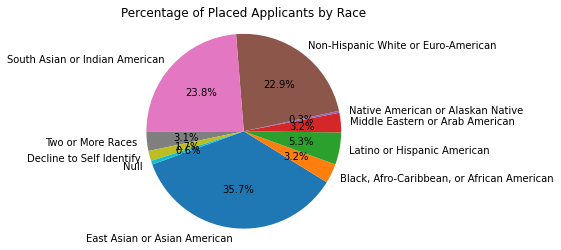

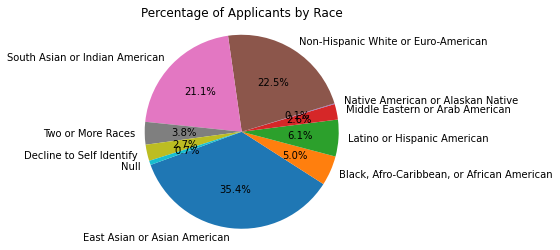

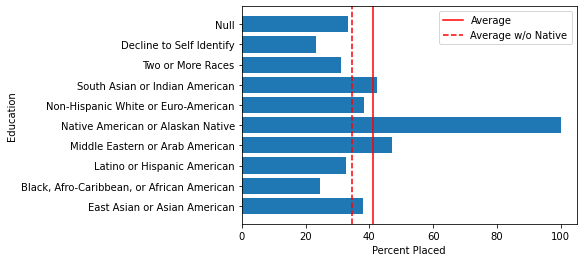

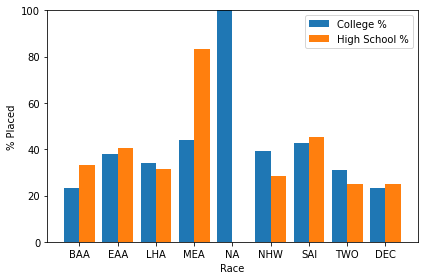

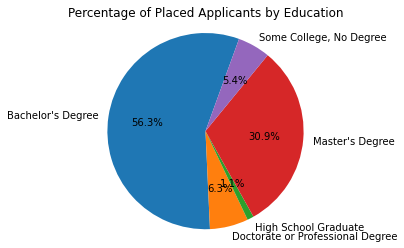

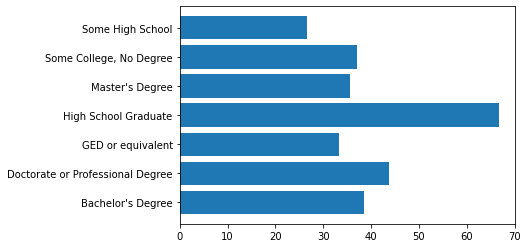

In [6]:
#--------------------------------------------------------------------------#
# this cell will be used for all the figures being made
#--------------------------------------------------------------------------#


#simple pie chart that depicts the break down of which applicants get placed the most
fig1, ax1 = plt.subplots()
plt.title('Percentage of Placed Applicants by Race')
ax1.pie(rz.placed, labels=rz.race, autopct='%2.1f%%', startangle=200)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#this is purposefully misleading

#Another pie chart showing the break down of applicants by race
fig2, ax2 = plt.subplots()
plt.title('Percentage of Applicants by Race')
ax2.pie(rz.applied, labels=rz.race, autopct='%2.1f%%', startangle=200)
ax2.axis('equal')

#A bar graph depicting the average percentage of placement~ meant to show how it is much more even
#than the pie chart above
fig3, ax = plt.subplots()
ax.barh(races,rz.percent)
#two lines to show the average percent
ax.axvline(avgP, ls='-', color='r',label ='Average')#the overall average percentage placement of all races
ax.axvline(avgPna, ls='--', color='r',label = 'Average w/o Native')#average percent placement of races excluding the outlier(Native American)
ax.set(xlim=[0, 105], xlabel='Percent Placed', ylabel='Race')
ax.legend()

labels = ['BAA','EAA','LHA','MEA','NA','NHW','SAI','TWO','DEC']
colpl = plotEDU.ColPCT
hspl  = plotEDU.HSPCT

x = np.arange(len(labels))  # the label locations
width = .4 # the width of the bars

#double bar graph to show the comparison between college placement and hs placement
fig, ed = plt.subplots()
rects1 = ed.bar(x-width/2, colpl, width, label='College %')
rects2 = ed.bar(x+width/2, hspl, width, label='High School %')
ed.set_xticks(x)
ed.set_xticklabels(labels)

ed.set(ylim=[0,100], xlabel='Race', ylabel='% Placed')
ed.legend()

fig.tight_layout()


#another pie graph showing percentage placement by education
fig4, ax3 = plt.subplots()
plt.title('Percentage of Placed Applicants by Education')
ax3.pie(pitable, labels=pilabl, autopct='%2.1f%%', startangle=70)
ax3.axis('equal') 

#a simple bar graph
fig5, ax4 = plt.subplots()
ax4.barh(edu,edu_df.Percent)
ax.set(xlim=[0, 105], xlabel='Percent Placed', ylabel='Education')

plt.show()